In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

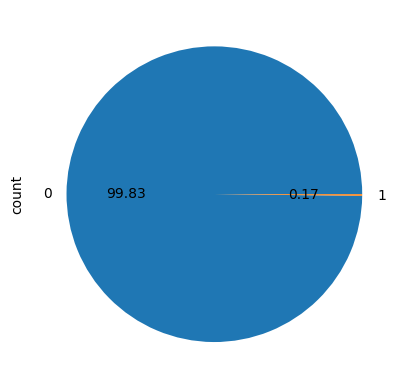

In [11]:
data['Class'].value_counts().plot(kind='pie',autopct='%0.2f')

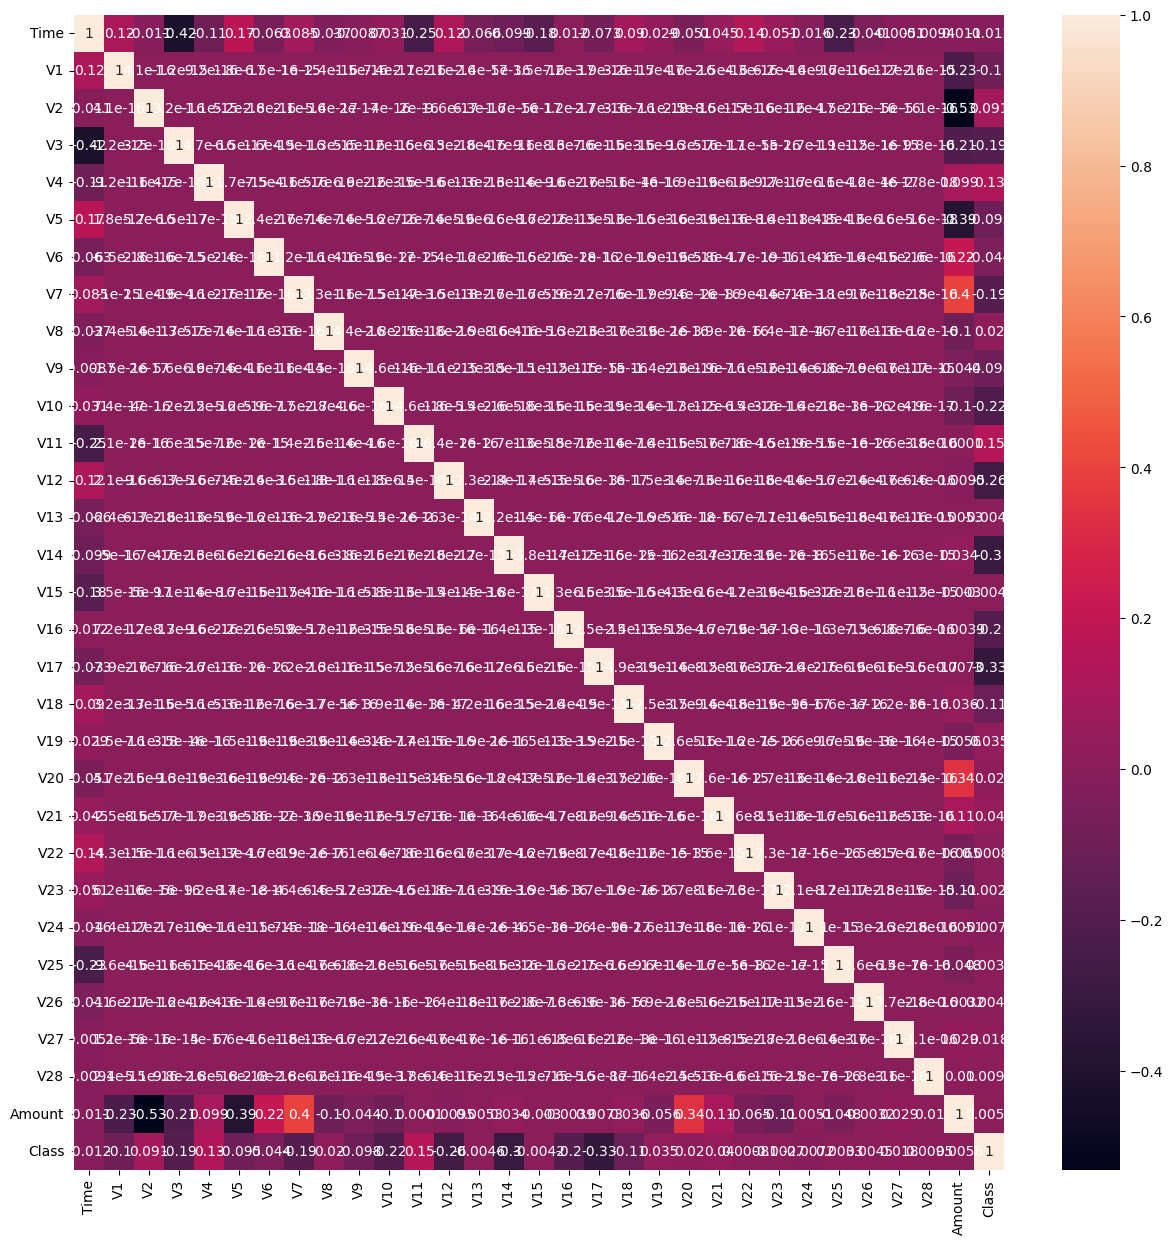

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr() , annot = True)
plt.show()

In [13]:
pip install mlxtend

  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


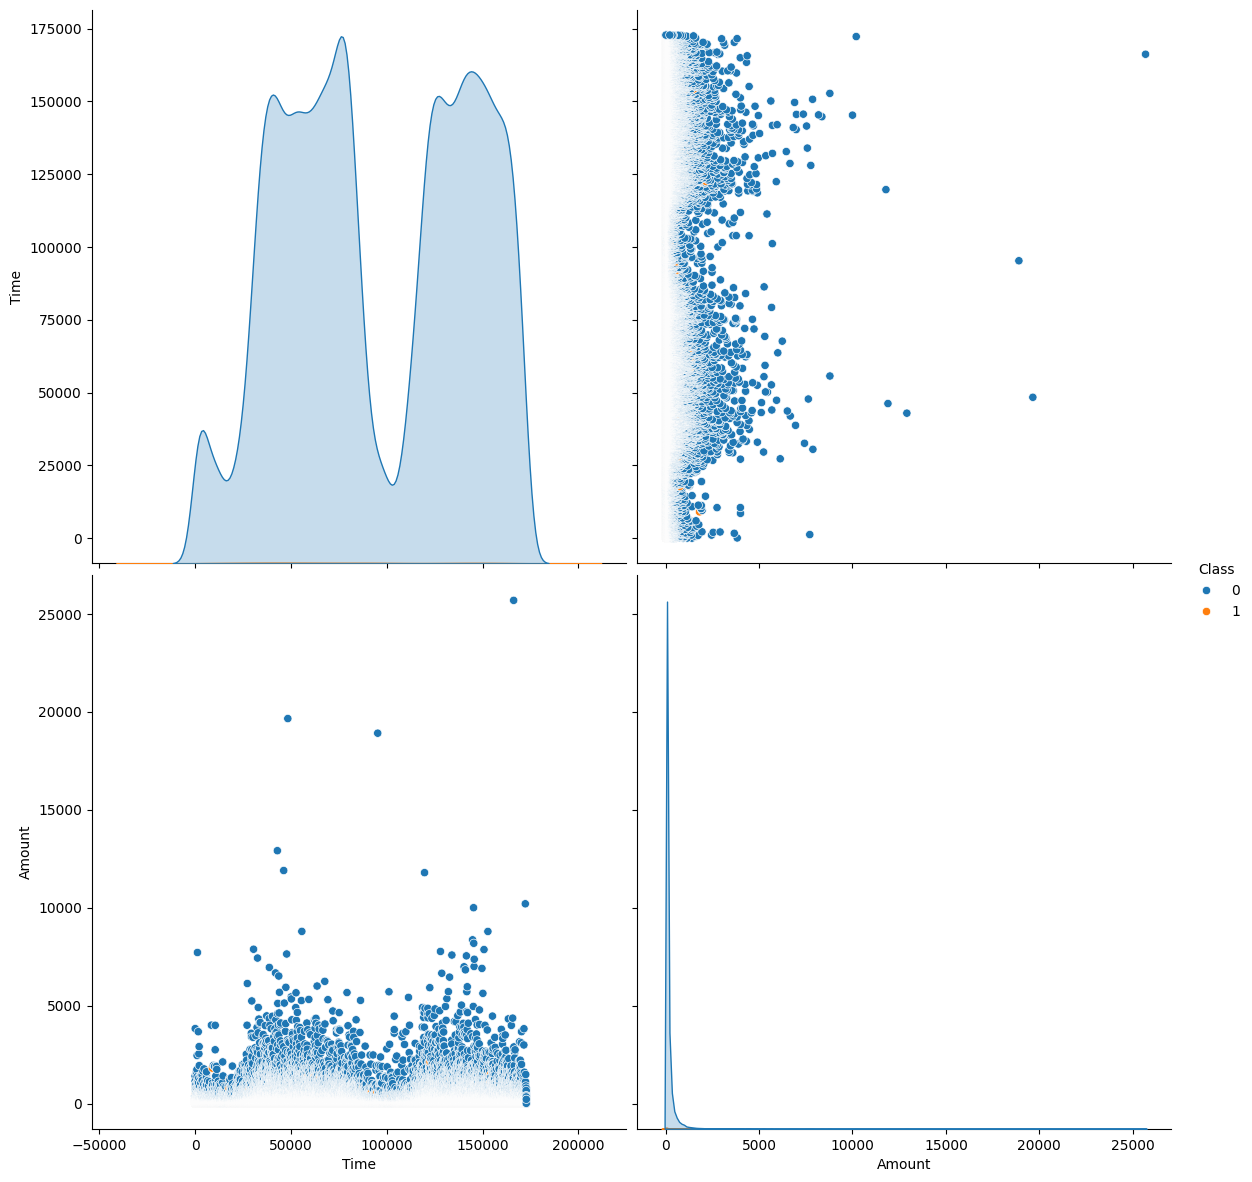

In [14]:
df_refine = data[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

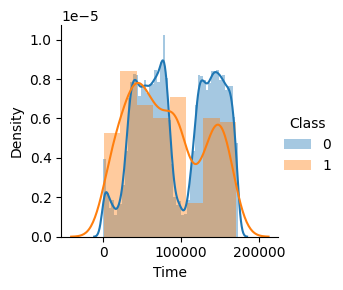

In [15]:
sns.FacetGrid(df_refine, hue="Class").map(sns.distplot,"Time").add_legend()
plt.show()

In [16]:
legit =data[data.Class == 0]
fraud =data[data.Class == 1]

In [17]:
legit.shape

(284315, 31)

In [18]:
fraud.shape

(492, 31)

In [19]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Data is inbalanced
We can do undersampling

In [21]:
legit_sample = legit.sample(n=492)

In [22]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [23]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260857,159752.0,-0.003014,0.197459,-0.019977,-2.341871,0.205178,-1.236227,0.613457,-0.234010,-1.404492,...,0.622693,1.857178,-0.129098,0.146127,-0.720105,-0.236423,0.455579,0.297609,15.00,0
275947,166809.0,0.043369,0.747519,0.230129,-0.595256,0.327776,-1.035819,0.890719,-0.087615,0.198249,...,-0.278158,-0.689931,0.084606,-0.133928,-0.548854,0.153100,0.240259,0.092612,2.69,0
159164,112289.0,2.091282,-0.085328,-1.458722,0.055316,0.464201,-0.291249,0.100798,-0.156631,0.261115,...,-0.297611,-0.725486,0.194395,-1.020646,-0.172253,0.239675,-0.072012,-0.079137,1.98,0
169233,119591.0,-0.911048,0.255332,2.139614,0.057022,0.221531,-0.296374,0.216946,0.173052,0.227521,...,0.180938,0.408529,-0.016832,-0.057714,-0.147905,-0.843908,0.159615,0.168473,45.00,0
279652,169013.0,2.141422,0.050224,-2.271115,-0.056881,0.650611,-1.324126,0.669858,-0.437047,0.355552,...,0.130729,0.448267,0.008308,0.702218,0.414875,0.216712,-0.094433,-0.075569,1.46,0


In [24]:
new_dataset.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160296,113202.0,2.136199,-0.070811,-1.783925,0.003515,0.550906,-0.483681,0.127230,-0.226612,0.853256,...,0.209378,0.740209,-0.079332,-0.013907,0.446163,-0.404619,0.000517,-0.055510,1.00,0
216980,140713.0,-0.987074,-0.641641,1.912897,0.642557,0.048984,-0.663104,-0.546202,0.110468,-0.117076,...,0.277879,0.509035,-0.007765,0.070826,-0.009244,1.846508,-0.034899,0.092015,72.88,0
95374,65275.0,1.274737,0.003771,-1.155977,0.260159,2.192283,3.604722,-0.446949,0.850691,0.173154,...,-0.187013,-0.477695,-0.121396,1.009574,0.895374,-0.325999,0.026456,0.011429,2.49,0
81812,59100.0,1.178517,0.178094,0.398743,1.394004,-0.205524,-0.200258,0.008355,0.028665,0.403328,...,-0.114767,-0.112838,-0.046594,0.074312,0.641004,-0.309552,0.036458,0.013171,1.00,0
158982,112054.0,-0.088901,0.455715,-2.269251,-0.991893,3.599496,3.223353,1.066167,0.627270,-0.345118,...,0.265852,0.812784,0.072056,0.702849,-1.063261,-0.883525,0.244852,0.292433,72.26,0


In [25]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, Y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9351969504447268


In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


In [35]:
X = data.drop('Class',axis=1)
y = data['Class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
predictions = dtree.predict(X_test)

In [41]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85282
           1       0.74      0.70      0.72       161

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X = pd.DataFrame(scaler.fit_transform(data.drop(["Class"],axis = 1)))
y =data.Class

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))

[[85271    14]
 [   28   130]]


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.90      0.82      0.86       158

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [55]:
import imblearn 
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [56]:
cols = data.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [57]:
X =data[cols]
Y =data[target]
X_under, Y_under = undersample.fit_resample(X, Y)

In [58]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

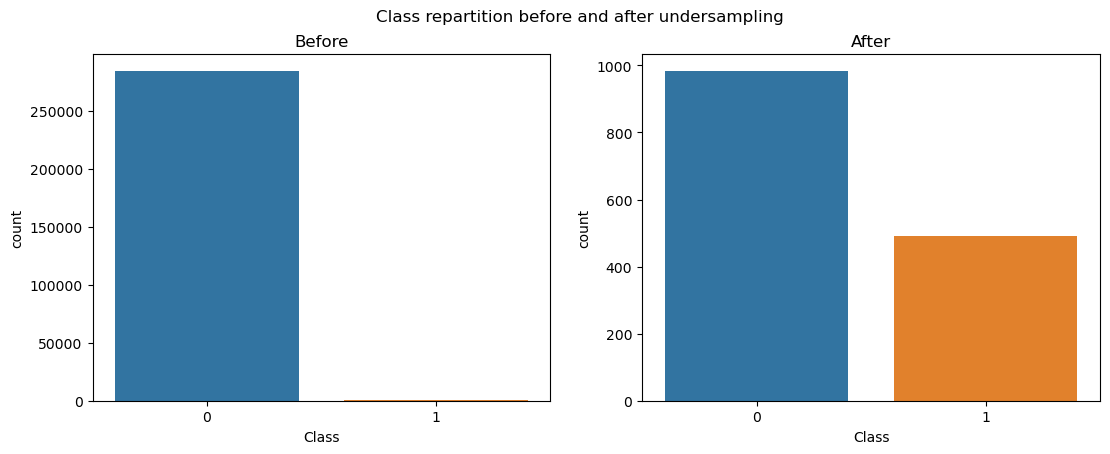

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [61]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [62]:
model = SVC()

In [63]:
model.fit(X_train,y_train)

SVC()

In [64]:
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [65]:
y_pred_svm = model2.predict(X_test)

In [66]:
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy SVM: 0.6351351351351351


In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

model_nb = GaussianNB()
model_rf = RandomForestClassifier()

model_nb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_nb = model_nb.predict(X_test)
print(f'Accuracy Score for Naive bayes: {accuracy_score(y_test, y_pred_nb)}')

y_pred_rf = model_rf.predict(X_test)
print(f'Accuracy Score for Random forest classifier: {accuracy_score(y_test, y_pred_rf)}')

Accuracy Score for Naive bayes: 0.8817567567567568
Accuracy Score for Random forest classifier: 0.9493243243243243


In [69]:
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[186   2]
 [ 33  75]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       188
           1       0.97      0.69      0.81       108

    accuracy                           0.88       296
   macro avg       0.91      0.84      0.86       296
weighted avg       0.89      0.88      0.88       296



In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': [0.1, 0.01, 0.5, 0.005, 0.001, 1e-6, 1e-8, 1e-10, 1e-11]}

In [71]:
grid = GridSearchCV(estimator = model_nb, param_grid= param_grid, cv=5,verbose=3)

In [72]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.678 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.674 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.674 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.674 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.674 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.678 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.674 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.674 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.674 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.674 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.678 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.01, 0.5, 0.005, 0.001, 1e-06,
                                           1e-08, 1e-10, 1e-11]},
             verbose=3)

In [73]:
grid.best_estimator_

GaussianNB(var_smoothing=1e-11)

In [74]:
grid.best_params_

{'var_smoothing': 1e-11}

In [75]:
model_nb_new = GaussianNB(var_smoothing = 0.5)
model_nb_new.fit(X_train, y_train)
y_pred_nb = model_nb_new.predict(X_test)
print(f'Accuracy Score for Naive Bayes : {accuracy_score(y_test, y_pred_nb)}')

Accuracy Score for Naive Bayes : 0.6351351351351351


In [76]:
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[188   0]
 [108   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       188
           1       0.00      0.00      0.00       108

    accuracy                           0.64       296
   macro avg       0.32      0.50      0.39       296
weighted avg       0.40      0.64      0.49       296



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
param_grid = {'n_estimators' : [50,100,150],
              'max_depth' : range(3,11,1),
              'random_state' : [0,50,100],
              'criterion' : ['gini', 'entropy']
              }

In [78]:
grid2 = GridSearchCV(model_rf , param_grid = param_grid, cv=5 , verbose = 3)
grid2.fit(X_train, y_train)
print(grid2.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.936 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.936 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.966 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.953 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.949 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.936 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.941 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.966 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, s

[CV 1/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=0;, score=0.936 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=0;, score=0.941 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=0;, score=0.962 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=0;, score=0.953 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=0;, score=0.941 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=50;, score=0.936 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=50;, score=0.941 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=50;, score=0.966 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=150, random_state=50;, score=0.945 total time=   0.4s
[CV 5/5] END criterion=g

[CV 2/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=0;, score=0.945 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=0;, score=0.962 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=0;, score=0.949 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=0;, score=0.949 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=50;, score=0.936 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=50;, score=0.941 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=50;, score=0.962 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=50;, score=0.945 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=100, random_state=50;, score=0.949 total time=   0.3s
[CV 1/5] END criterion=

[CV 3/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=0;, score=0.962 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=0;, score=0.949 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=0;, score=0.949 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.945 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.936 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.970 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.945 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.953 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=100;, score=0.941 total time=   0.1s
[CV 2/5] END criterion=gini, m

[CV 4/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=0;, score=0.953 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=0;, score=0.945 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=50;, score=0.941 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=50;, score=0.936 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=50;, score=0.966 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=50;, score=0.953 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=50;, score=0.962 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=100;, score=0.945 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=150, random_state=100;, score=0.936 total time=   0.6s
[CV 3/5] END criter

[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=0;, score=0.949 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=0;, score=0.945 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=50;, score=0.936 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=50;, score=0.941 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=50;, score=0.966 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=50;, score=0.949 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=50;, score=0.949 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=100;, score=0.936 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=100, random_state=100;, score=0.936 total time=

[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=0;, score=0.962 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=0;, score=0.949 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=0;, score=0.949 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.936 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.941 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.966 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.945 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.941 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=100;, score=0.936 total time=   0.1s
[CV

[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=0;, score=0.941 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=0;, score=0.962 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=0;, score=0.949 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=0;, score=0.949 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=50;, score=0.936 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=50;, score=0.941 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=50;, score=0.962 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=50;, score=0.945 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=150, random_state=50;, score=0.949 total time=   0

[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=0;, score=0.941 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=0;, score=0.936 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=0;, score=0.966 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=0;, score=0.953 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=0;, score=0.949 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=50;, score=0.945 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=50;, score=0.941 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=50;, score=0.966 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=100, random_state=50;, score=0.949 total time=   0.

[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=150, random_state=100;, score=0.953 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.949 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.936 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.966 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.949 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.949 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.945 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.941 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.975 total time=   0

In [79]:
grid2.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 50,
 'random_state': 50}

In [81]:
model_rf_new = RandomForestClassifier(criterion='entropy',
                                       max_depth=10,
                                       n_estimators=50,
                                      random_state =50)
model_rf_new.fit(X_train, y_train)
y_pred_rf = model_rf_new.predict(X_test)
print(f'Accuracy Score for Random Forest : {accuracy_score(y_test, y_pred_rf)}')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy Score for Random Forest : 0.9459459459459459
[[186   2]
 [ 14  94]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       188
           1       0.98      0.87      0.92       108

    accuracy                           0.95       296
   macro avg       0.95      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296

